In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/(2) drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [6]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


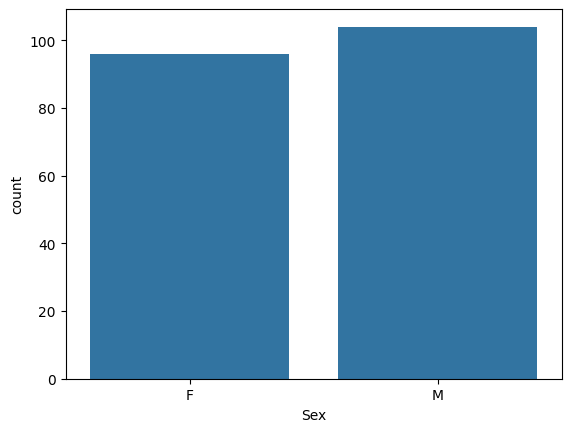

In [8]:
x=df.Sex.value_counts()
print(x)
p=sns.countplot(data=df , x='Sex')
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


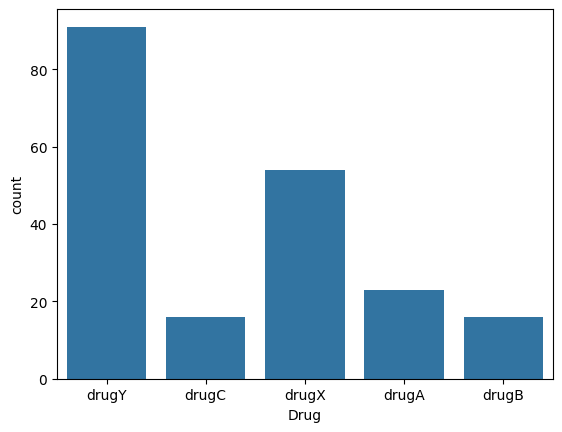

In [9]:
x=df.Drug.value_counts()
print(x)
p=sns.countplot(data=df , x='Drug')
plt.show()

In [10]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

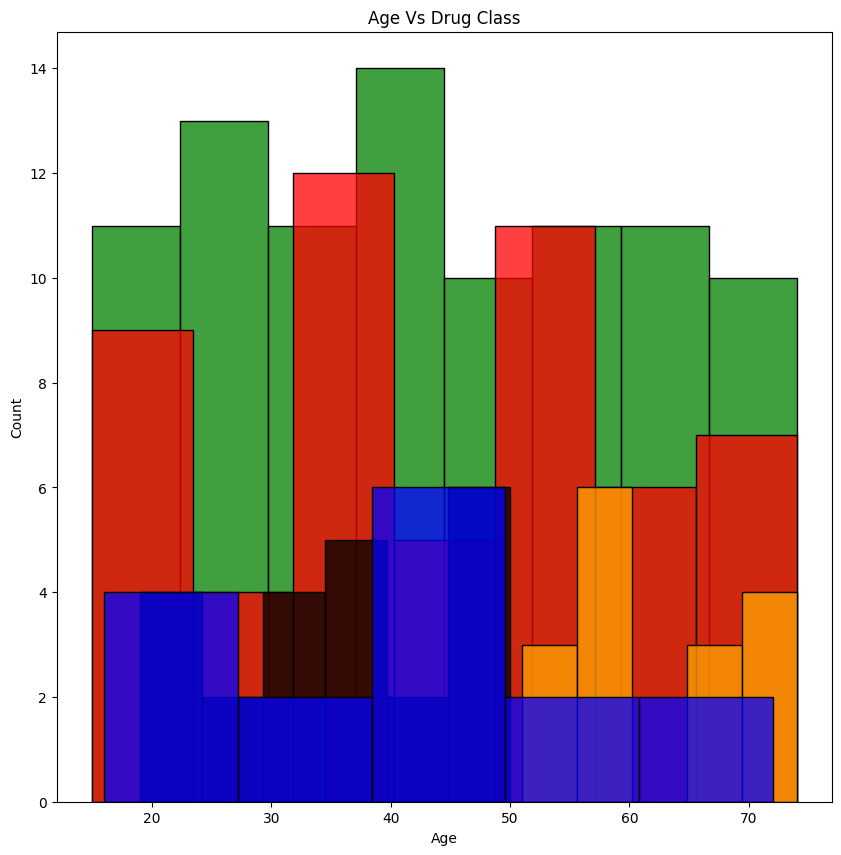

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['Drug']=='drugY']['Age'] , color='green')
sns.histplot(df[df['Drug']=='drugX']['Age'] , color='red')
sns.histplot(df[df['Drug']=='drugA']['Age'] , color='black')
sns.histplot(df[df['Drug']=='drugB']['Age'] , color='orange')
sns.histplot(df[df['Drug']=='drugC']['Age'] , color='blue')
plt.title("Age Vs Drug Class")
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['BP']=oe.fit_transform(df[['BP']])
df['Sex']=oe.fit_transform(df[['Sex']])
df['Cholesterol']=oe.fit_transform(df[['Cholesterol']])
df['Drug']=oe.fit_transform(df[['Drug']])


In [13]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [16]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [18]:
y

,Drug
0,4.0
1,2.0
2,2.0
3,3.0
4,4.0
...,...
195,2.0
196,2.0
197,3.0
198,3.0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,y , random_state=42, test_size=0.2)

In [20]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [21]:
y_train

,Drug
79,3.0
197,3.0
38,3.0
24,4.0
122,4.0
...,...
106,3.0
14,3.0
92,4.0
179,4.0


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini' , random_state=0)
clf_gini.fit(X_train , y_train)
y_pred_gini =clf_gini.predict(X_test)

In [23]:
y_pred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini , y_test))

1.0


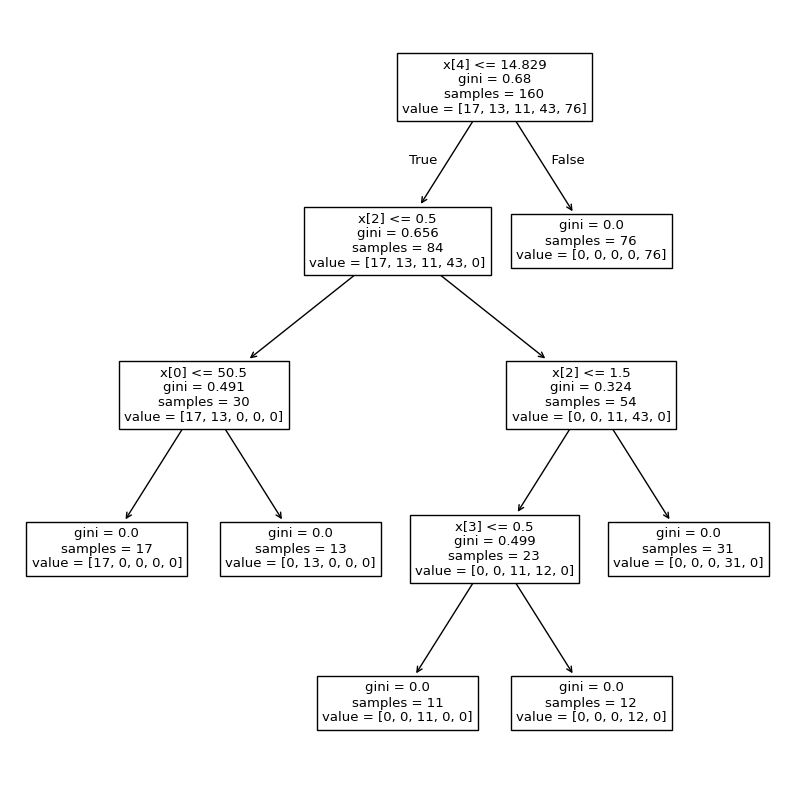

In [25]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train , y_train))
plt.show()

In [26]:
clf_entropy=DecisionTreeClassifier(criterion='entropy' , max_depth=3 , random_state=0)
clf_entropy.fit(X_train , y_train)
y_pred_entropy=clf_entropy.predict(X_test)

0.875


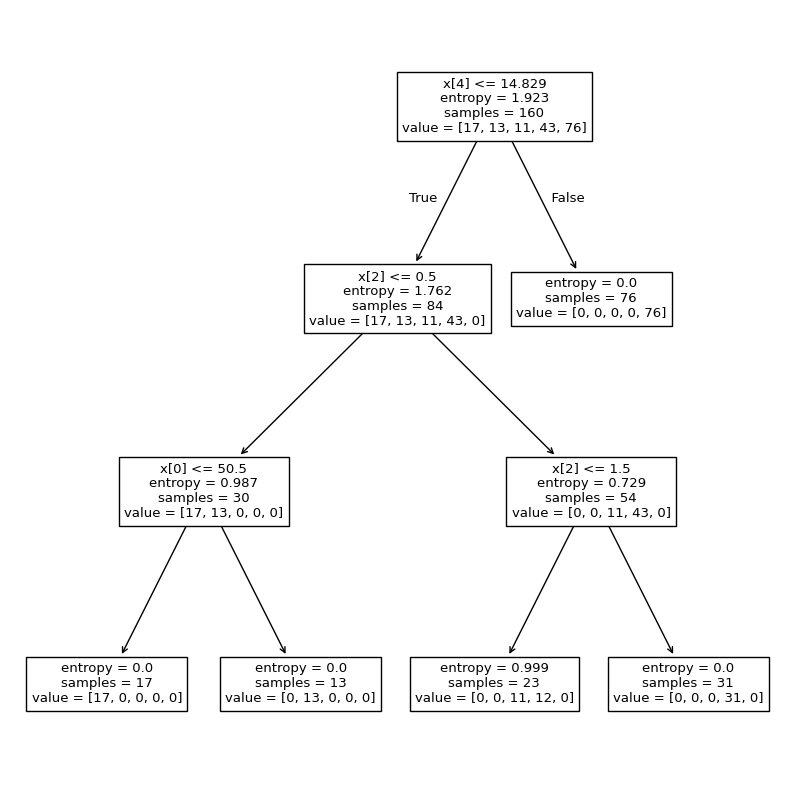

In [27]:
print(accuracy_score(y_test , y_pred_entropy))
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train , y_train))
plt.show()